In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot

In [2]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ACE ARIMA analysis
Do ARIMA analysis of ACE

Main reference: https://www.justintodata.com/arima-models-in-python-time-series-prediction/

Code to make datetime and remove NaNs:

In [ ]:
# ace_1min_14_22=pd.read_csv(r"..\ImportData\ace_1min_14_22.csv")
# ace_1min_14_22['datetime'] = pd.to_datetime(ace_1min_14_22["GMTTime"])
# ace_1min_14_22_nan_removed = ace_1min_14_22[np.logical_not(ace_1min_14_22['1 Min ACE Average'].isnull())]
# ace_1min_14_22_nan_removed = pd.read_pickle("ace_1min_14_22_nan_removed.pkl")


In [4]:
ace_1min_14_22_nan_removed = pd.read_pickle("ace_1min_14_22_nan_removed.pkl")
# ace_1min_14_22_nan_removed = pd.read_pickle(r"/content/drive/MyDrive/NYU courses/Sem 3/pTSA/Project/Data/ace_1min_14_22_nan_removed.pkl")

In [5]:
dta = ace_1min_14_22_nan_removed['1 Min ACE Average']

In [6]:
ace_1min_14_22_nan_removed.iloc[:10000]

,GMTTime,1 Min ACE Average,datetime
0,2014-03-01T06:00:00Z,-26.991,2014-03-01 06:00:00+00:00
1,2014-03-01T06:01:00Z,-86.129,2014-03-01 06:01:00+00:00
2,2014-03-01T06:02:00Z,-95.177,2014-03-01 06:02:00+00:00
3,2014-03-01T06:03:00Z,-69.576,2014-03-01 06:03:00+00:00
4,2014-03-01T06:04:00Z,-31.908,2014-03-01 06:04:00+00:00
...,...,...,...
9995,2014-03-08T04:37:00Z,-124.560,2014-03-08 04:37:00+00:00
9996,2014-03-08T04:38:00Z,-37.590,2014-03-08 04:38:00+00:00
9997,2014-03-08T04:39:00Z,-46.445,2014-03-08 04:39:00+00:00
9998,2014-03-08T04:40:00Z,67.835,2014-03-08 04:40:00+00:00


In [7]:
dta = ace_1min_14_22_nan_removed['1 Min ACE Average']
dta_full = dta
dta = dta_full[:10000]

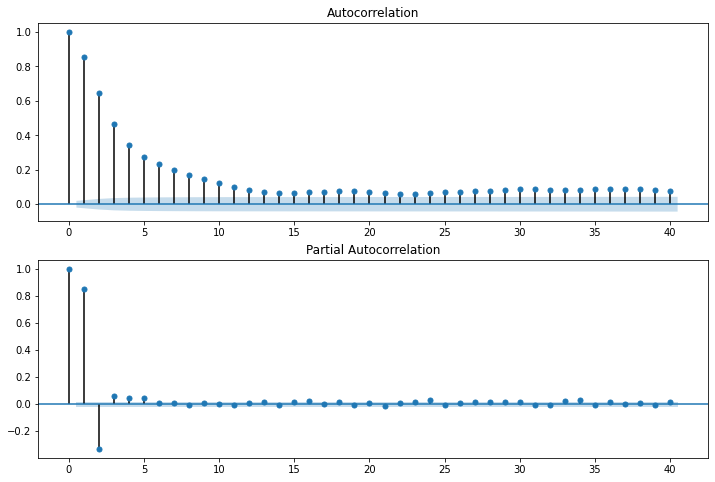

In [8]:
# From Lab 4
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

ACF does drop around 10, PACF has spike at 1 and negative spike at 2. Maybe choose p = 2?

In [ ]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# ADF

In [9]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dta)
print(f'p-value: {adf_test[1]}')


p-value: 0.0


ADF test suggests already stationary

Try p = 1 and p = 2

In [10]:
# TODO: chose p appropriately
p = 1

arma_mod = sm.tsa.ARIMA(dta, order=(p,0,0)).fit()
print(arma_mod.params)
# https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# show summary
print(arma_mod.summary())

const                     -20.883798
ar.L1.1 Min ACE Average     0.856100
dtype: float64
                              ARMA Model Results                              
Dep. Variable:      1 Min ACE Average   No. Observations:                10000
Model:                     ARMA(1, 0)   Log Likelihood              -54743.255
Method:                       css-mle   S.D. of innovations             57.704
Date:                Thu, 08 Dec 2022   AIC                         109492.509
Time:                        04:33:00   BIC                         109514.140
Sample:                             0   HQIC                        109499.831
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -20.8838      4.008     -5.211      0.000     -28.739     -13.029
ar.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


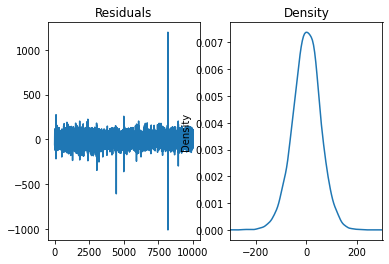

In [11]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# look at residuals
model_fit = arma_mod
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[1].set_xlim(-300,300)
plt.show()


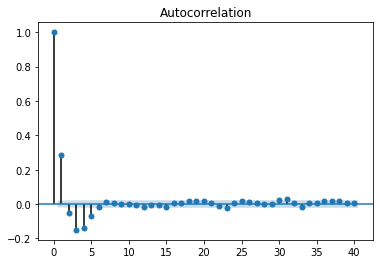

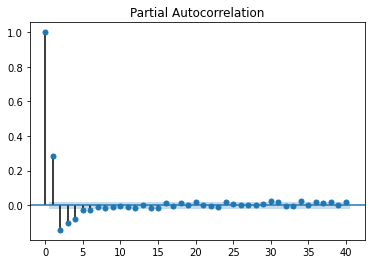

In [12]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)


Looks worse than AR(2), there is some correlation with lag 1 in residuals.

### p = 2 ARIMA: AR(2)

In [13]:
# TODO: chose p appropriately
p = 2

arma_mod = sm.tsa.ARIMA(dta, order=(p,0,0)).fit()
print(arma_mod.params)
print(arma_mod.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


const                     -20.906607
ar.L1.1 Min ACE Average     1.138947
ar.L2.1 Min ACE Average    -0.330359
dtype: float64
                              ARMA Model Results                              
Dep. Variable:      1 Min ACE Average   No. Observations:                10000
Model:                     ARMA(2, 0)   Log Likelihood              -54165.448
Method:                       css-mle   S.D. of innovations             54.463
Date:                Thu, 08 Dec 2022   AIC                         108338.897
Time:                        04:33:40   BIC                         108367.738
Sample:                             0   HQIC                        108348.659
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -20.9066      2.845     -7.349  

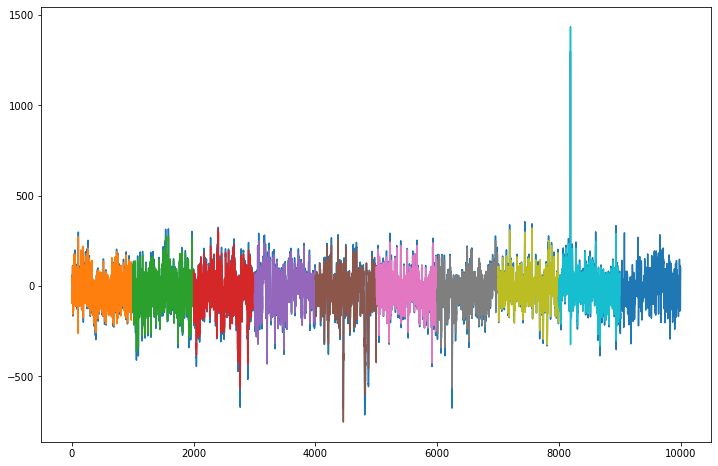

In [14]:
tsteps= 1000

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['0':].plot(ax=ax)
T = np.arange(0, 10000, tsteps)
for tt in range(len(T)-1):
    pred = arma_mod.predict(int(T[tt]), int(T[tt+1]))#, ax=ax, plot_insample=False)
    pred.plot(ax=ax)
plt.show()


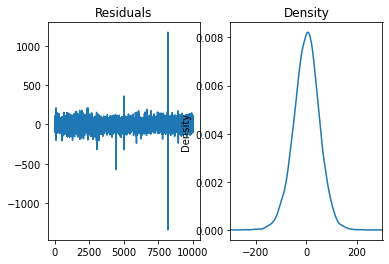

In [15]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# look at residuals
model_fit = arma_mod
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[1].set_xlim(-300,300)
plt.show()


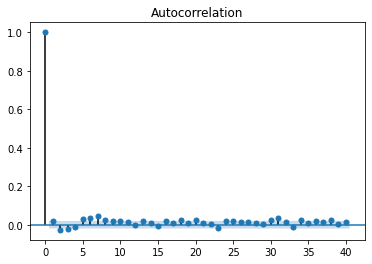

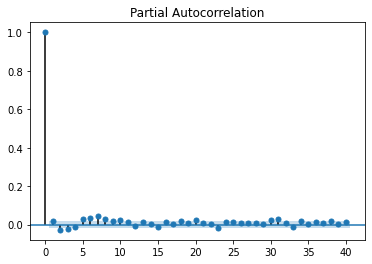

In [16]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)


Residuals look like white noise.

In [17]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
df_train = dta
df_test = dta_full[10000:10010]
df = ace_1min_14_22_nan_removed.iloc[:10010]

In [18]:
forecast_test = model_fit.forecast(len(df_test))

In [19]:
a = [None]*len(df_train)
b = list(forecast_test)
len(a + b)

10003

In [20]:
forecast_test

(array([ 89.9431589 ,  64.68926229,  39.96235515,  20.14256613,
          5.73762848,  -4.12119028, -10.59106445, -14.70296075,
        -17.24881288, -18.79000244]),
 array([ 54.46338979,  82.54752864,  97.91272675, 105.57318905,
        109.11411784, 110.64791652, 111.27554898, 111.51978277,
        111.61064449, 111.64308968]),
 array([[ -16.80312357,  196.68944137],
        [ -97.10092085,  226.47944542],
        [-151.94306291,  231.86777322],
        [-186.77708214,  227.0622144 ],
        [-208.12211268,  219.59736965],
        [-220.98712162,  212.74474106],
        [-228.68713281,  207.5050039 ],
        [-233.27771854,  203.87179704],
        [-236.00165638,  201.50403062],
        [-237.60643734,  200.02643246]]))

10010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


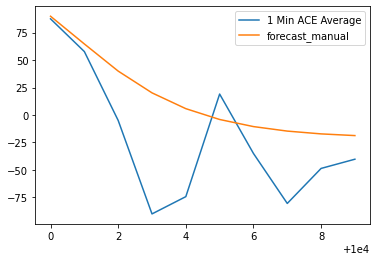

In [21]:
forecast_test = model_fit.forecast(len(df_test))

none_list = [None]*len(df_train)
forecast_test_list = list(forecast_test[0])
forecast_manual = none_list + forecast_test_list
print(len(forecast_manual))

df['forecast_manual'] = none_list + forecast_test_list
# df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df[['1 Min ACE Average','forecast_manual']].iloc[10000:10010].plot()


Doesn't forecast well after two steps, reverts to mean.

In [22]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 34.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [23]:
import sys
# !conda install --yes --prefix {sys.prefix} pmdarima


In [24]:
# https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# Auto fit the data
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima


ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

In [25]:
auto_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -54152.151
Date:                Thu, 08 Dec 2022   AIC                         108314.303
Time:                        04:38:17   BIC                         108350.354
Sample:                             0   HQIC                        108326.506
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.006     -0.094      0.925      -0.013       0.012
ar.L1          1.1304      0.003    340.279      0.000       1.124       1.137
ar.L2         -0.3385      0.004    -82.558      0.000      -0.347      -0.330
ma.L1         -0.9889      0.002   -615.533      0.000      -0.992      -0.986
sigma2      2961.4232     10.895    271.821      0.000    2940.070    2982.777
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):           1505792.75
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.74
Prob(H) (two-sided):                  0.14   Kurtosis:                        63.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


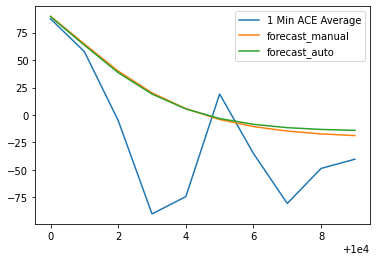

In [26]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

#df.plot()
df[['1 Min ACE Average','forecast_manual','forecast_auto']].iloc[10000:10010].plot()


pretty similar

### Differencing I/d parameter
Take a look at differencing

In [ ]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# reference for differencing

In [27]:
dta_diff = dta.diff().dropna()

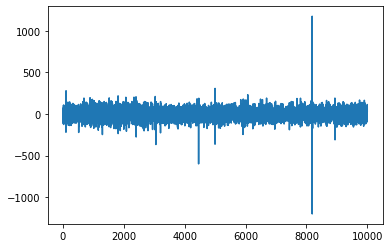

In [28]:
dta_diff.plot()

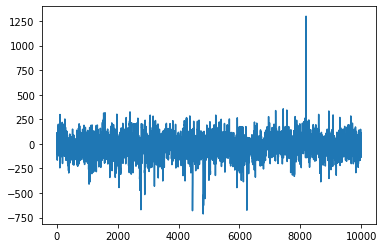

In [29]:
dta.plot()

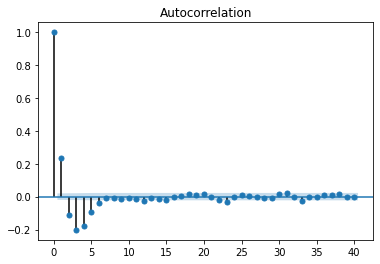

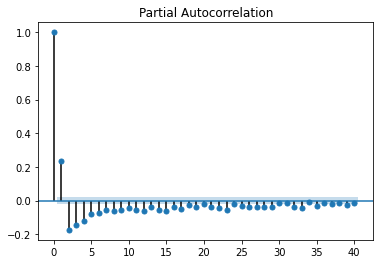

In [30]:
acf_diff = plot_acf(dta_diff)
pacf_diff = plot_pacf(dta_diff)

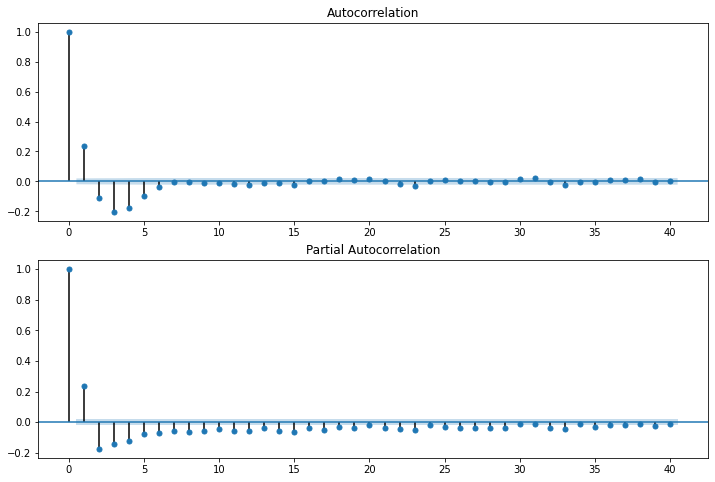

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_diff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_diff, lags=40, ax=ax2)
plt.show()

The automatic fit chose ARIMA(2, 1, 1).

In [32]:
auto_sarima = pm.auto_arima(df_train, stepwise=False, seasonal=True)
auto_sarima

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

Hence there is no seasonality in the data with period 1. 

In [33]:
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -54152.151
Date:                Thu, 08 Dec 2022   AIC                         108314.303
Time:                        04:41:29   BIC                         108350.354
Sample:                             0   HQIC                        108326.506
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.006     -0.094      0.925      -0.013       0.012
ar.L1          1.1304      0.003    340.279      0.000       1.124       1.137
ar.L2         -0.3385      0.004    -82.558      0.000      -0.347      -0.330
ma.L1         -0.9889      0.002   -615.533      0.000      -0.992      -0.986
sigma2      2961.4232     10.895    271.821      0.000    2940.070    2982.777
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):           1505792.75
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.74
Prob(H) (two-sided):                  0.14   Kurtosis:                        63.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


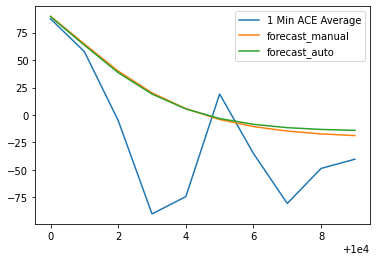

In [34]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

#df.plot()
df[['1 Min ACE Average','forecast_manual','forecast_auto']].iloc[10000:10010].plot()

References:

https://otexts.com/fpp3/seasonal-arima.html

https://medium.com/geekculture/time-series-forecast-in-python-5c4c61e1c2c2

Lists of classical time series methods:

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://towardsdatascience.com/lets-forecast-your-time-series-using-classical-approaches-f84eb982212c (open in incognito/private mode if no subscription)